### Analiza danych w Python 3.8. C5. CNN

In [ ]:
from fastai.vision import *
from fastai import *
import fastai
import torch
import torch.nn.functional as F
print(fastai.__version__)

# Zaimportowanie bibliotek

1.0.61


In [ ]:
t_cpu = torch.rand(500,500,500)
%timeit t_cpu @ t_cpu

# Sprawdzenie CR CPU

defaults.device = torch.device('cuda')

# Wybranie GPU na domyślne narzędzie trenowania sieci

1 loop, best of 5: 1.89 s per loop


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PAD-Project')
path = Path('/content/drive/My Drive/PAD-Project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
classes = ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma','Hygrocybe', 'Lactarius', 'Mushrooms', 'Russula', 'Suillus']
# Określenie klas danych

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)
    
# Zdjęcia, które nie są możliwe do odtworzenia przez komputer są automatycznie usuwane z okeślonego katalogu

Agaricus


Amanita


Boletus


Cortinarius


Entoloma


Hygrocybe


Lactarius


Mushrooms
Russula


Suillus


In [ ]:
tfms = get_transforms(flip_vert = False, do_flip = False, max_lighting = 0.00, max_rotate = 0.00,
                     max_zoom = 0.00, p_affine = 0.00, p_lighting = 0.00)

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(tfms, resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

# Losowe przdzielenie zdjęć z określonych katalogów do klas, wybór propocji danych treningowych i testowych
# ds_tfms odpowiada tutaj za modyfikowanie danych, korzystałem z https://docs.fast.ai/vision.data.html
# Wartości domyślne dla get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Optional[Collection[Transform]]=None) → Collection[Transform]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

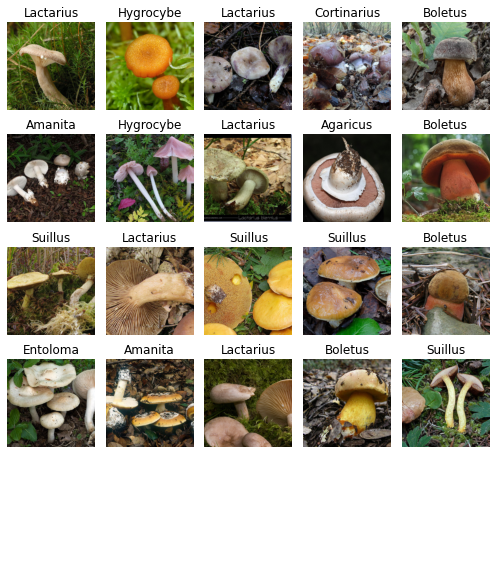

In [ ]:
data.show_batch(rows=5, figsize=(7,8))

# Pokazuje 9 losowo wybranych zdjęć z przypisaną do nich kategorią

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

# Pokazuje informcję o liczbie klas oraz o liczbie materiałów przeznaczonych do treningu oraz do testu

(['Agaricus',
  'Amanita',
  'Boletus',
  'Cortinarius',
  'Entoloma',
  'Hygrocybe',
  'Lactarius',
  'Russula',
  'Suillus'],
 9,
 4530,
 1132)

In [ ]:
learn = cnn_learner(data, models.densenet201, metrics=accuracy, model_dir="/content/drive/My Drive/PAD-Project")
# resnet18, resnet34, resnet50, resnet101, resnet152, squeezenet1_0, squeezenet1_1, densenet121, densenet169, 
# densenet201, densenet161, vgg16_bn, vgg19_bn, alexnet
learn.lr_find()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


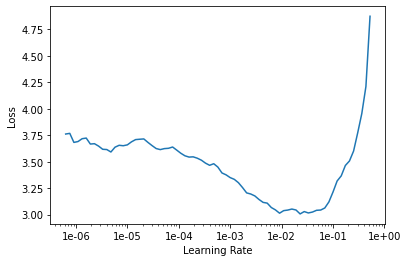

In [ ]:
learn.recorder.plot()

In [28]:
learn.data.batch_size = 25

# batch size domyślnie wynosi 64
learn.fit_one_cycle(5, 1e-3)

# epoki przy one cycle policy - Smith

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 


In [ ]:
learn.validate(learn.data.valid_dl)

# validation loss dla ostatniej epoki

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

[0.43279174, tensor(0.8657)]

In [27]:
learn.validate(learn.data.train_dl)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 


KeyboardInterrupt: ignored

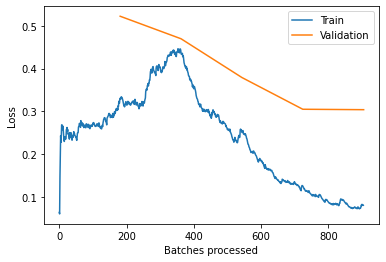

In [29]:
learn.recorder.plot_losses()

# generuje wykres, ktory przedstawia epoki z train/validation loss

In [30]:
learn.recorder.plot_lr

# przegląd warstw modelu

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

<bound method Recorder.plot_lr of Recorder
learn: Learner(data=ImageDataBunch;

Train: LabelList (4530 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Lactarius,Lactarius,Lactarius,Lactarius,Lactarius
Path: /content/drive/My Drive/PAD-Project;

Valid: LabelList (1132 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Agaricus,Suillus,Cortinarius,Lactarius,Russula
Path: /content/drive/My Drive/PAD-Project;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
  

In [31]:
learn.summary()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [128, 56, 56]        8,192      False     
___________________________________________________

In [32]:
learn.save('stage-1')

# zapis efektów pierwszej fazy treningu

In [33]:
learn.export('export.pkl')

# eksportujemy model jako "model-homework-resnet101.pk"

In [34]:
learn.load('stage-1');

# załadowanie etapu treningu

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

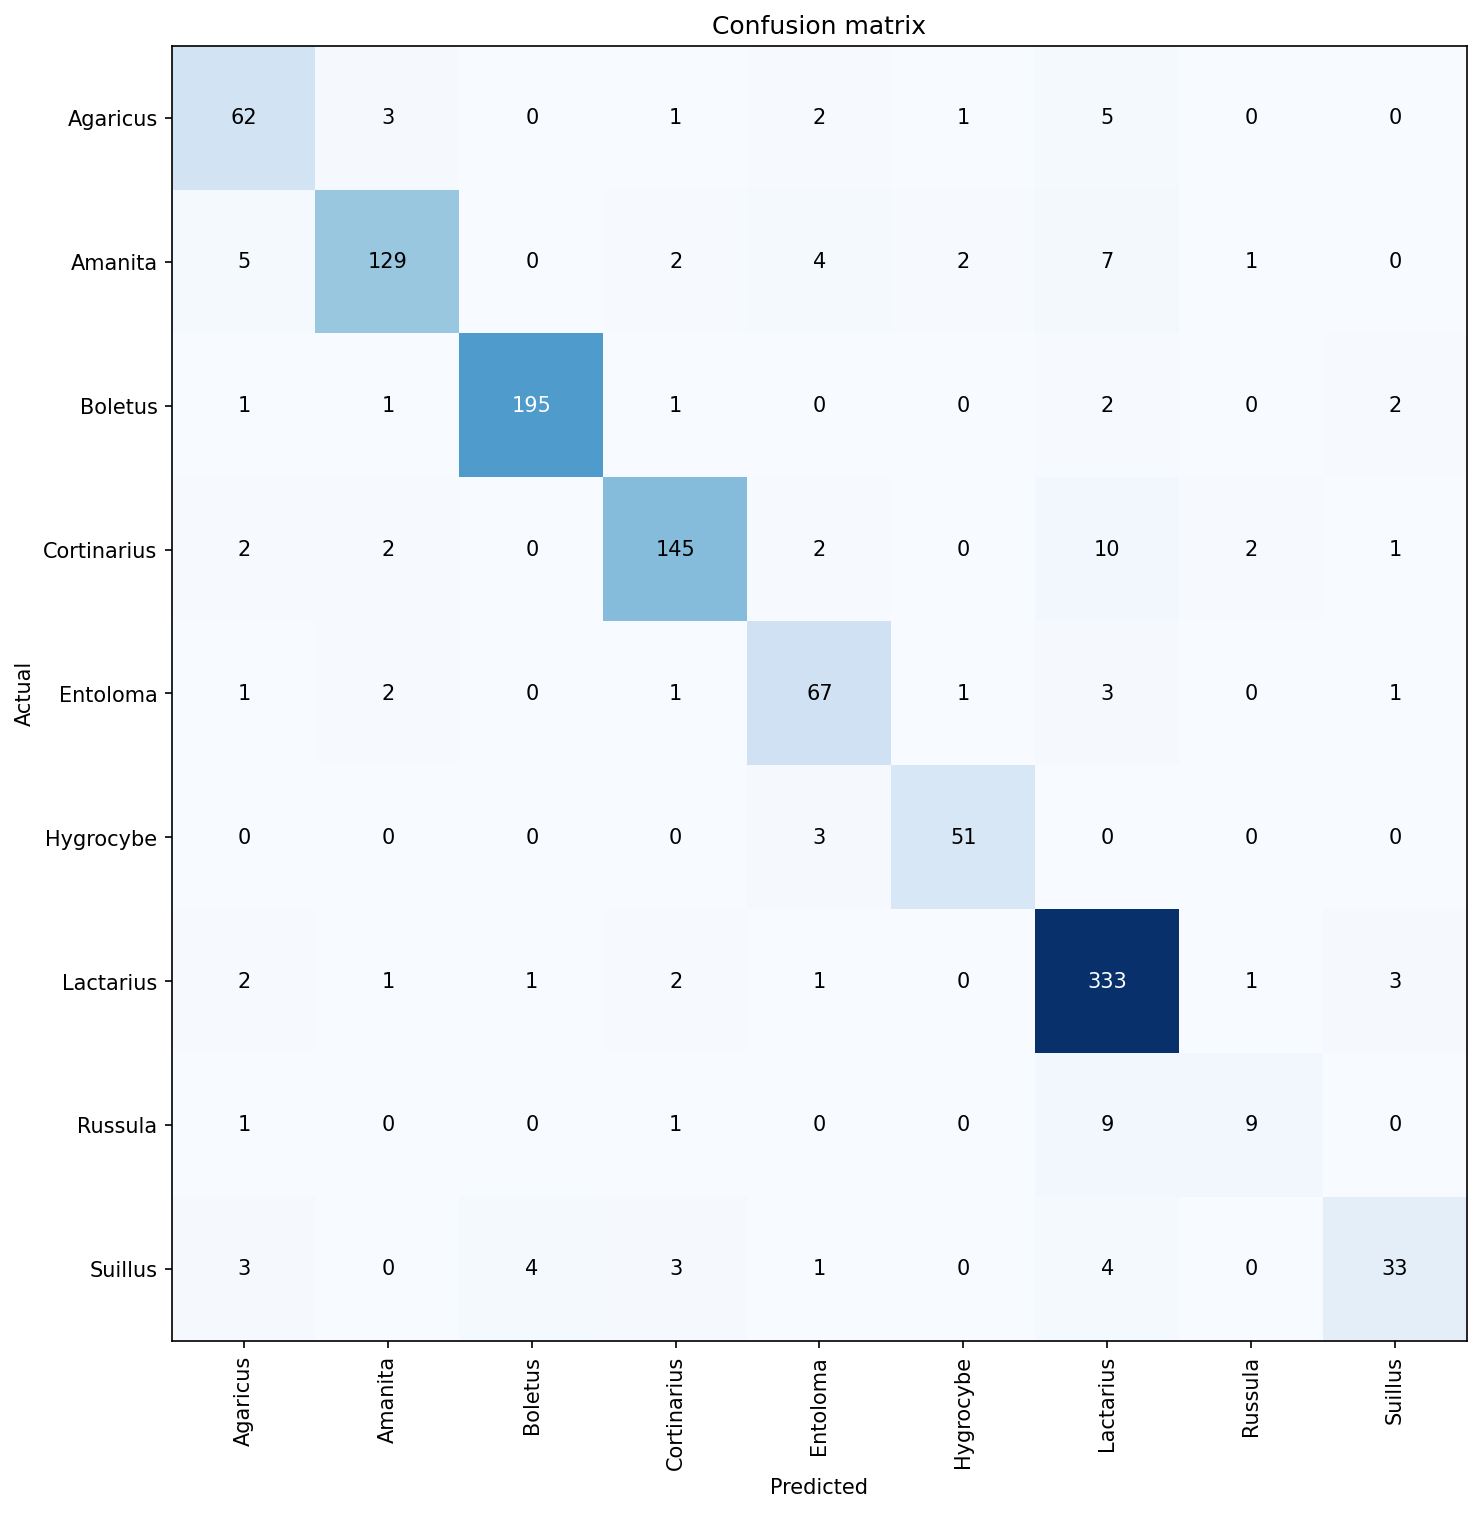

In [36]:
interp.plot_confusion_matrix(figsize=(15,10), dpi = 150)

# tworzenie tabeli zawierającej informacje o kategoriach, które sieć myliła najczęściej

In [37]:
interp.plot_top_losses(10, figsize = (20, 20), heatmap = True)

# stworzenie map ciepła miejsc, które w największym stopniu "zmyliły" sieć

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [38]:
interp.most_confused(min_val=2)

[('Cortinarius', 'Lactarius', 10),
 ('Russula', 'Lactarius', 9),
 ('Amanita', 'Lactarius', 7),
 ('Agaricus', 'Lactarius', 5),
 ('Amanita', 'Agaricus', 5),
 ('Amanita', 'Entoloma', 4),
 ('Suillus', 'Boletus', 4),
 ('Suillus', 'Lactarius', 4),
 ('Agaricus', 'Amanita', 3),
 ('Entoloma', 'Lactarius', 3),
 ('Hygrocybe', 'Entoloma', 3),
 ('Lactarius', 'Suillus', 3),
 ('Suillus', 'Agaricus', 3),
 ('Suillus', 'Cortinarius', 3),
 ('Agaricus', 'Entoloma', 2),
 ('Amanita', 'Cortinarius', 2),
 ('Amanita', 'Hygrocybe', 2),
 ('Boletus', 'Lactarius', 2),
 ('Boletus', 'Suillus', 2),
 ('Cortinarius', 'Agaricus', 2),
 ('Cortinarius', 'Amanita', 2),
 ('Cortinarius', 'Entoloma', 2),
 ('Cortinarius', 'Russula', 2),
 ('Entoloma', 'Amanita', 2),
 ('Lactarius', 'Agaricus', 2),
 ('Lactarius', 'Cortinarius', 2)]